<font color="orange" size="6"><b>Programmation dynamique</b></font>

<font color="blue" size="5"><b>🐇 I. Fibonacci récursif naïf</b></font>

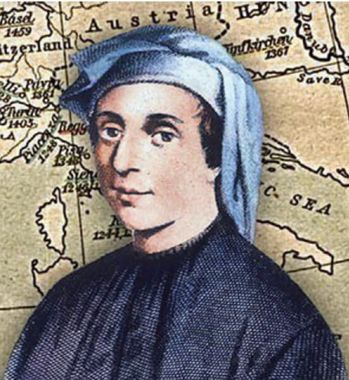

In [ ]:
# 1 1 2 3 5 8 13 21 34 ...

# codez la fonction fiboRec (avec une fonction récursive)
def fiboRec(n) :
    pass

In [ ]:
for i in range(1, 35) : 
    print(i, fiboRec(i))

Que constatez vous ???

In [ ]:
from timeit import timeit
import matplotlib.pyplot as plt


abscisse = [5, 10, 15, 20, 25, 28, 30]
ordonnee=[0 for _ in range(len(abscisse))]
for i in range(len(abscisse)) :
    ordonnee[i] = timeit("fiboRec(abscisse[i])", number = 10, globals = globals())

# Graphique pour le calcul récursif
plt.plot(abscisse, ordonnee, "ro-") # en rouge


plt.show()
plt.close()

hmmm.... pas fameux !!!
Mais il fallait s'y attendre, la complexité est exponentielle.

Imaginons que vous le fassiez à la main, et que vous cherchez `fib(5)` :

`fib(5) = fib(4) + fib(3)`

Après avoir calculé `fib(4)`, qui vous aura amené à calculer `fib(3)`, vous devrez ajouter `fib(4)`.

Allez vous recommencer le calcul de  `fib(3)` ou vous resservir du résultat précédent ?

<font color="blue" size="5"><b>🐘 II. Fibonacci récursif + mémoïsation</b></font>

In [ ]:
# Codez ci-dessous la version avec mémoïsation

def fibomem(n):
    """
    n est un entier supérieur ou égal à 1.
    La fonction renvoie le terme de la suite de Fibonacci de rang n.
    """
    memo = {1:1, 2:1} # dictionnaire servant à mémoriser les termes connus ou calculés
    return fibo(n, memo)

def fibo(n, memo) :
    """ 
    n est un entier supérieur ou égal à 1.
    memo est un dictionnaire servant à mémoriser les termes de la suite.
    memo[k] est le terme de rang k
    La fonction renvoie le terme de rang n, donc renvoie memo[n]
    On utilise de la programmation dynamique, memo est complété au fur et à 
    mesure de l'exécution de la fonction.
    """
    pass


assert fibomem(100) == 354224848179261915075

In [ ]:
for i in range(1,40): 
    print(i, fibo(i, {1:1, 2:1}))

D'emblée... c'est mieux non ?

Voyons le graphique :

In [ ]:
from timeit import timeit
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(90000)

abscisse = [i for i in range(1000, 22000, 3000)]
ordonnee=[0 for _ in range(len(abscisse))]
for i in range(len(abscisse)) :
    ordonnee[i] = timeit(stmt = "fibomem(abscisse[i])", number=100, globals=globals())


# Graphique 
plt.plot(abscisse, ordonnee, "ro-",label="Recursif mémoïsé") # en rouge

plt.legend()
plt.show()
plt.close()

Il est toujours possible de coder de plein de façon différentes... mais nous allons voir qu'elles ne sont pas forcément équivalentes...

In [ ]:
# Variante n°1 : un argument par défaut plutot qu'une fonction intermédiaire

def fibomem2(n, memo = None):
    pass

assert fibomem2(100) == 354224848179261915075


In [ ]:
from timeit import timeit
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(90000)

abscisse = [i for i in range(1000, 15000, 3000)]

# Pour la version initiale en rouge
ordonnee=[0 for _ in range(len(abscisse))]
for i in range(len(abscisse)) :
    ordonnee[i] = timeit(stmt = "fibomem(abscisse[i])", number=100, globals=globals())

# Pour la version avec argument par defaut en vert
ordonneev1 = [0 for _ in range(len(abscisse))]
for i in range(len(abscisse)) :
    ordonneev1[i] = timeit(stmt = "fibomem2(abscisse[i])", number = 100, globals = globals())

# Graphique 
plt.plot(abscisse, ordonnee, "ro-", label="récursif mémoïsé") # en rouge
plt.plot(abscisse, ordonneev1, "go-", label="variante avec arg. par défaut") # en vert

plt.legend()
plt.show()
plt.close()

La complexité est la même, c'est assez normal...

Maintenant, faisons une variante dans laquelle memo est une liste et pas un dictionnaire :

In [ ]:
# Variante n°2 : on mémorise avec une liste

def fibomem3(n, memo = None) :
    """ 
    n est un entier supérieur ou égal à 1.
    memo est une liste servant à mémoriser les termes de la suite.
    memo[k] est le terme de rang k. 
    F1 = 1 et F2 = 1. On a donc memo[1] = 1 et memo[2] = 1. 
    On peut choisir memo[0] = 0 (On a aussi F0 = 0)
    La fonction renvoie le terme de rang n de la suite, donc renvoie memo[n]
    On utilise de la programmation dynamique, memo est complété au fur et à 
    mesure de l'exécution de la fonction.
    """
    if memo == None : 
        memo = [0, 1, 1]
    if len(memo) > n : 
        return memo[n]
    memo.append(fibomem3(n - 1, memo) + fibomem3(n - 2, memo) )
    return memo[n]
fibomem3(100)


In [ ]:
from timeit import timeit
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(90000)

abscissev2 = [i for i in range(1000, 15000, 3000)]
ordonneev2=[0 for i in range(len(abscissev2))]
for i in range(len(abscissev2)) :
    ordonneev2[i] = timeit(stmt='fibomem3(abscissev2[i])', number=100, globals=globals())

# Graphique 
plt.plot(abscissev2, ordonneev2, "ro-", label="mémo est une liste") # en rouge
plt.plot(abscissev2, ordonneev1, "go-", label="mémo est un dictionnaire") # en vert

plt.legend()
plt.show()
plt.close()

L'accès à un élément d'un dictionnaire ou d'une liste est en O(1), c'est à dire en "temps constant". 

Dans les 2 cas on voit quelque chose qu'on pourrait qualifier de pseudo linéaire...

<font color="blue" size="5"><b>🧗 III Fibonacci : approche de bas en haut</b></font>

On parle aussi de méthode **bas-haut**, ou **bottom-up** en anglais.

Il s'agit d'une méthode itérative dans laquelle on commence par calculer des solutions pour les sous-problèmes les plus petis puis, de proche en proche, on arrivera à la taille voulue. Comme précédemment, on utilise le principe de la mémoïsation pour stocker les résultats partiels.

De manière générale, on utilise un tableau pour stocker les résultats au fur et à mesure. Voici les étapes :

1. Création et initialisation du tableau :
On a besoin d'un tableau `fib` de taille n + 1 qui va contenir les valeurs `fib[0]`, `fib[1]`, ..., `fib[n]` dans cet ordre.
Pour cela on crée ce tableau avec n + 1 zéros initialement.On peut stocker les valeurs déjà connues (`fib[0]`, `fib[1]`)

2. Utilisation de la formule de récurrence pour remplir le reste du tableau :

La formule de récurrence donne la solution d'un sous-problème à partir de celles de sous-problèmes plus petits et donc déjà traités !  
Ici on a pour 2 ≤ i ≤ n : `fib[i] = fib[i - 1] + fib[i - 2]`

Le résultat est la dernière valeur du tableau : on la renvoie !

In [ ]:
# Codez l'approche de bas en haut

def fiboMonte(n) :
    pass

In [ ]:
from timeit import timeit
import matplotlib.pyplot as plt
abscisse = [i for i in range(1000, 22000, 3000)]

# Pour la version avec mémoisation en rouge
ordonnee=[0 for _ in range(len(abscisse))]
for i in range(len(abscisse)) :
    ordonnee[i] = timeit(stmt = "fibomem(abscisse[i])", number=100, globals=globals())

# Pour la version de bas en haut en vert
ordonneeMonte=[0 for _ in range(len(abscisse))]
for i in range(len(abscisse)) :
    ordonneeMonte[i] = timeit(stmt = "fiboMonte(abscisse[i])", number=50, globals=globals())

# Graphique 
plt.plot(abscisse, ordonnee, "ro-",label='récursif mémoïsé') # en rouge
plt.plot(abscisse, ordonneeMonte, "go-",label='approche bas en haut') # en vert

plt.legend()
plt.show()
plt.close()

## 🐍 version purement pythonesque

Comprendre le code suivant :

In [ ]:
# une version purement pythonesque
def fiboMonte2(n) :
    a = b = 1
    for i in range(3, n+1) :
        a, b = a + b, a
    return a
    
fiboMonte2(100)

Bon, dans le cours on a dit que c'est linéaire....

Regardons pour de plus grandes valeurs de n ....

avec la version montante, sans récursion, on peut aller très loin. Voyez les 2 courbes ci-dessous, décidément non, ce n'est pas très linéaire.... je dirais O(n²).

Avez vous une idée de la raison ?

Avec les versions de bas en haut, on peut explorer des grandes valeurs de n :  
⏳ Il faut un peu de patience ...  


In [ ]:
from timeit import timeit
import matplotlib.pyplot as plt
abscisse = [i for i in range(1000,60000,3000)]
ordonneeMonte = [0 for _ in range(len(abscisse))]
ordonneeMonte2 = [0 for _ in range(len(abscisse))]

for i in range(len(abscisse)) :
    ordonneeMonte[i] = timeit(stmt="fiboMonte(abscisse[i])", number = 50, globals = globals())
    ordonneeMonte2[i] = timeit(stmt="fiboMonte2(abscisse[i])", number = 50, globals = globals())

# Graphique 
plt.plot(abscisse, ordonneeMonte, "ro-",label='Approche montante avec liste') # en rouge
plt.plot(abscisse, ordonneeMonte2, "go-",label='Approche montante pythonesque') # en vert

plt.legend()
plt.show()
plt.close()

# 👉 voici un petit élément de réflexion :





## Combien d'octets pour coder fibo(20000) ?


In [ ]:
# combien d'octets pour coder fibo(20000) ?
print('nombre de chiffres de fibo(20000) :', len(str(fiboMonte2(20000))))


Ah oui quand même ! fibo(20000) est de l'ordre de  $10^{4179}$ ! (en fait supérieur à $10^{4179}$)

En première approximation, il faut $n$ bits tels que $2^n > 10^{4179}$  
On a déjà vu que la fonction $\log_2(x)$ était la réciproque de la fonction $2^x$.  
Tester ci-dessous :

In [ ]:
from math import log2
print(log2(2**3))
print(log2(2**10))

3.0
10.0


Notons $n$ le nombres minimum de bits nécessaires :  
On a vu qu'en première approximation : $n > \log_2( 10^{4179})$

In [ ]:
# calculez n
from math import log2
n = ...



Calculons maintenant le nombre d'octets nécessaires :

In [ ]:
print("cela demande ", round(n/8), "octets") # je divise par 8 pour obtenir le nombre d'octets

 Un nombre codé sur 1735 octets !!!   
 L'addition sera plus longue que l'addition d'entier en 64 bits genre 1+1=2 de Fibo(3) !
Le temps constant de l'addition n'est donc plus vrai, et l'addition tend à passer en 0(n), d'ou vraisemblablement la complexité en 0(n²).

###  👉 Remarque : détermination exacte du nombre d'octets nécessaire.

Il suffit d'utiliser Python :  
On commence par coder fibo(20000) en binaire :

In [ ]:
fibo_20000_bin = bin(fiboMonte2(20000))
print(fibo_20000_bin)

Le nombre de bits est la longueur de cette chaine de caractère moins 2 (les deux caractères 0b du début)

In [ ]:
n = 
print(n)

Le nombre exact d'octets nécessaire est donc :

In [ ]:
from math import ceil
# ceil calcule l'arrondi à l'entier supérieur
n_octets = ceil(n/8)
print(n_octets)


## 👍 Belle performance : le calcul de fibo(100000) 

Combien d'octets faut-il pour coder fibo(100000) ?

In [ ]:
# Votre code pour trouver la réponse

<center>

---

**Auteurs** Jean-Louis Thirot (Lycée Bertrand d'Argentré - Vitré (35)) et Mireille COILHAC (lycée Saint-Aspais - Melun)     
Publié sous licence CC BY-NC-SA


---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" width="200" src="https://s2.qwant.com/thumbr/700x0/f/9/436dcce5e02185c0b2e1b0e7a969aa81d7b0438d0a7f2eaee89abb9661b70b/cc-by-nc-sa.svg_.png?u=http%3A%2F%2Fopensiddur.org%2Fwp-content%2Fuploads%2F2011%2F03%2Fcc-by-nc-sa.svg_.png&q=0&b=1&p=0&a=1" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. 